In [44]:
#Import necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2gray,label2rgb
import numpy as np
#Read original image containing shadow in or_img in BGR

# There are 4 images with file name shadowtest1.png, shadowtest2.png, shadowtest3.png, shadowtest4.png
image_number = 3
or_img = cv2.imread('shadowtest'+str(image_number)+'.png')

#plt.imshow(cv2.cvtColor(or_img, cv2.COLOR_BGR2RGB))
#plt.imshow(or_img)


In [45]:
#Convert the BGR image to an YCbCr image
y_cb_cr_img = cv2.cvtColor(or_img, cv2.COLOR_BGR2YCrCb)

#Create a copy of the image in order to create a binary mask
binary_mask = np.copy(y_cb_cr_img)

#Calculate pixels mean value in Y plane
y_mean = np.mean(cv2.split(y_cb_cr_img)[0])

#Calculate Standard Deviation in Y plane
y_std = np.std(cv2.split(y_cb_cr_img)[0])

# Creating a binary mask by classfying pixels to shadow and non shadow region
for i in range(y_cb_cr_img.shape[0]):
    for j in range(y_cb_cr_img.shape[1]):

        if y_cb_cr_img[i, j, 0] < y_mean - (y_std / 3):
            # Give shadow pixels white color 
            binary_mask[i, j] = [1, 1, 1]
        else:
            # Give non shadow pixels black color
            binary_mask[i, j] = [0, 0, 0]


In [46]:
# Taking one of the dimension out of R , G or B as R,G,B values of each pixel are same, either 0 or 255.
mask = binary_mask[:,:,0]
#That gives us, shadow pixels have a value 1, while non shadow pixels have a value 0.

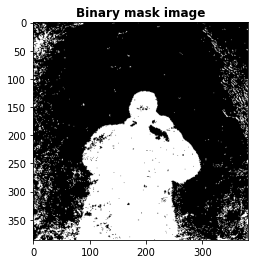

In [47]:
# Plotting the mask image
plt.imshow(mask, cmap='gray', vmin=0, vmax=1)
plt.title('Binary mask image',fontweight='bold')
plt.show()

In [48]:
# Creating an array to store average of the pixels for shadowed region
one = np.array([0,0,0])
# one_count stores count of number of shadowed pixels
one_count = 0
# Creating an array to store average of the pixels for non-shadowed region
zero = np.array([0,0,0])
# one_count stores count of number of non-shadowed pixels
zero_count = 0
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
            #Updating one array and one_count for shadowed regions.
        if(mask[i,j]==1):
            one+=or_img[i,j]
            one_count+=1
        else:
            #Updating one array and one_count for non-shadowed regions.
            zero+=or_img[i,j]
            zero_count+=1
#Calculating the average of the pixel values.            
one = one/one_count
zero = zero/zero_count


In [49]:
#Round of zero and one array to nearest integer value.
one = np.round(one)
zero = np.round(zero)
print(one, zero)

[67. 79. 84.] [124. 153. 171.]


In [50]:
#Calculating the difference in average non-shadowed and shadowed regions
diff = zero-one
#Changing the dtype to int64
diff = np.array(diff,dtype=np.int64)


In [51]:
#Creating a copy of original image to remove shadow
img = or_img.copy()
#Converting image to array
img = np.array(img,dtype=np.int64)
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if(mask[i,j]==1):
            #If the pixel is shadow, add the difference of average non-shadowed and average shadowed pixels to the pixel.
            img[i,j]+=diff
img[img>255] = 255
#If somehow, pixel value becomes more than 255 due to adding the average, update pixel value to 255

In [52]:
def BGR_ro_RGB(img):
    cache = img.copy()
    B = np.array([cache[:,:,0]])
    G = np.array([cache[:,:,1]])
    R = np.array([cache[:,:,2]])

    cache[:,:,0] = R
    cache[:,:,1] = G
    cache[:,:,2] = B

    return cache

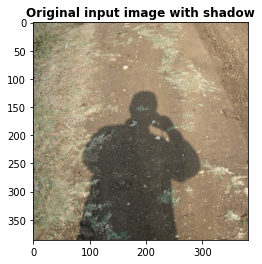

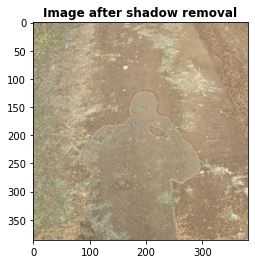

In [53]:
#or_img is the original image with shadow 
#plt.imshow(or_img,  vmin=0, vmax=255)
plt.imshow(cv2.cvtColor(or_img, cv2.COLOR_BGR2RGB), vmin=0, vmax=255)
#Plot or_img as the input image with shadow
plt.title("Original input image with shadow", fontweight='bold')
plt.savefig('shadowtest'+str(image_number)+'_original.jpg')
plt.show()

#img is the image after performing shadow removal
plt.imshow(BGR_ro_RGB(img), cmap='brg', vmin=0, vmax=255)
#Plot img as the output image
plt.title("Image after shadow removal", fontweight='bold')
plt.savefig('shadowtest'+str(image_number)+'_result.jpg')
plt.show()

